In [1]:
# Build a Neural Net in 4 Minutes by Siraj Raval
# https://www.youtube.com/watch?v=h3l4qz76JhQ
# https://github.com/stmorgan/pythonNNexample (sources by Siraj)
#
# More:
#

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# sigmoid
def nonlin(x, deriv=False):
    if (deriv==True):
        # Siraj function doesn't look like real derivative of sigmoid
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(z):
    # derivative of sigmoid function
    # from here (http://lumiverse.io/video/part-4-backpropagation)
    return np.exp(-z)/((1+np.exp(-z))**2)

In [4]:
# input data
x = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

In [5]:
# output data
y = np.array([[0],
              [1],
              [1],
              [0]])

In [6]:
# for test purpose
np.random.seed(1)

In [7]:
# synapses
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

In [8]:
# training step
for j in range(60000):
    l0 = x
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))
    
    # backpropagation
    l2_error = y - l2
#     l2_delta = l2_error * nonlin(l2, deriv=True)
    l2_delta = l2_error * sigmoid_prime(l2)
    l1_error = l2_delta.dot(syn1.T)
#     l1_delta = l1_error * nonlin(l1, deriv=True)
    l1_delta = l1_error * sigmoid_prime(l1)

    if (j % 10000) == 0:
        print('Error: {}'.format(str(np.mean(np.abs(l2_error)))))

    # gradient descent
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
print('output after training')
print(l2)

Error: 0.496410031903
Error: 0.393981110333
Error: 0.0288131720625
Error: 0.0099229924723
Error: 0.00568111948811
Error: 0.00377729600328
output after training
[[ 0.00250789]
 [ 0.99687745]
 [ 0.99712593]
 [ 0.00224075]]


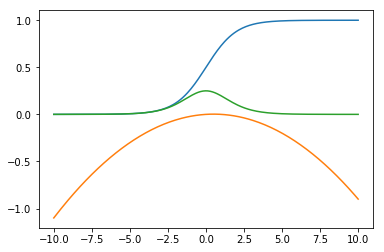

In [9]:
X = np.linspace(-10, 10, 256, endpoint=True)
plt.plot(X, nonlin(X))
# with scaled deriv of sigmoid of Siraj
plt.plot(X, nonlin(X, deriv=True)/100)
plt.plot(X, sigmoid_prime(X))
plt.show()

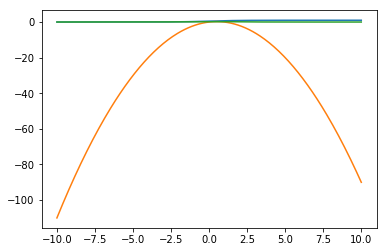

In [10]:
X = np.linspace(-10, 10, 256, endpoint=True)
plt.plot(X, nonlin(X))
# with original deriv of sigmoid of Siraj
plt.plot(X, nonlin(X, deriv=True))
plt.plot(X, sigmoid_prime(X))
plt.show()